In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report 

In [6]:
iris = datasets.load_iris() 
X = iris.data[:, :2] 
y = iris.target 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=42)

In [9]:
svm_classifier = SVC(kernel='linear', C=1) 
svm_classifier.fit(X_train, y_train) 
y_pred = svm_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}") 
 
report = classification_report(y_test, y_pred) 
print("Classification Report:\n", report)

Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



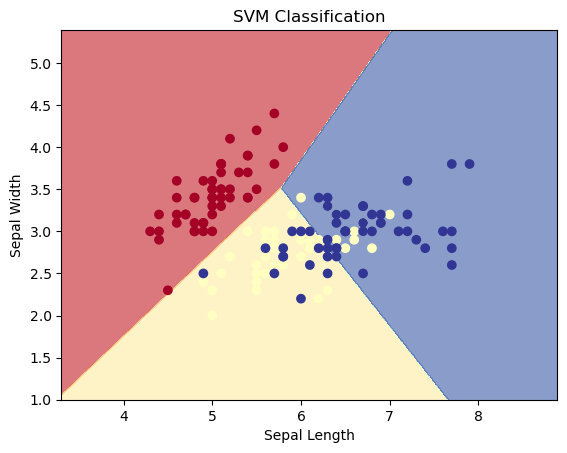

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 
0.01)) 
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
 
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu) 
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width') 
plt.title('SVM Classification') 
plt.show()